<h1> Exploratory Data Analysis </h1>
<h3>Title:</h3> <em>Visualization of various statistical data on US Accidents dataset.</em> 
<h3>Author:</h3> <em>Uttam Kumar</em>

In [1]:
from feature_extraction import *
import pandas as pd
import numpy as np
import seaborn as sns
import math
import warnings; warnings.simplefilter('ignore')
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 10
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap

In [26]:
#arp_df = pd.read_csv('../data_files/US_Accidents_June20.csv')  #only for first time when no modified version exist
#arp_df = pd.read_pickle('../data_files/US_Accidents_June20_modified.pkl') #3513617 rows, 57 col incl cust time feat
#arp1_df = pd.read_pickle('../data_files/US_Accidents_June20_modified_v1.pkl') #geo features, 3513617 row, 63 clmn 
#arp_df = pd.read_pickle('../data_files/US_Accidents_June20_modified_v2.pkl') #weather cond., 3513617 row, 69 clmn
#arp_df = pd.read_pickle('../data_files/US_Accidents_June20_modified_v2.pkl') #NaN handled, 3487860 rows, 70 colmns
arp_df = pd.read_pickle('../data_files/US_Accidents_June20_modified_v3.pkl') 
traffic_df = pd.read_csv('../data_files/TrafficEvents_Aug16_Dec20_Publish.csv') #new traffic ds published Jan 2021
weather_df = pd.read_csv('../data_files/WeatherEvents_Aug16_Dec20_Publish.csv') #new weather ds published Jan 2021
# 4 Severity, 1+96 timeQuartOfDay, Comn strt 25 i.e. total 196 columns,  3487860 rows exist now
cont_df = geopandas.read_file("../data_files/geo_basics/ne_110m_admin_0_countries.shp") #Continents
na_df = cont_df.loc[cont_df['continent'] == 'North America']  #North America
usa_df = na_df.loc[na_df['iso_a3']=='USA'] #USA
#usa_df.plot()

<h2> Accidents(Number) vs Severity </h2>

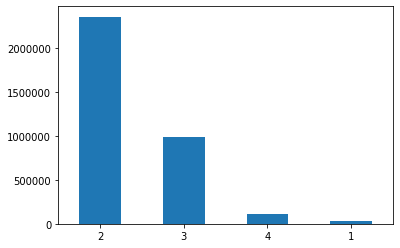

In [3]:
arp_df["Severity"].value_counts().plot.bar(rot=0)   #2:1.88M 3:0.76M 4:0.083M 1:0.028

<h3> Conclusion:</h3><br>
<em> Severity 2 accidents are happening more often. </em>

<h2> Accidents(Number) vs TMC </h2>

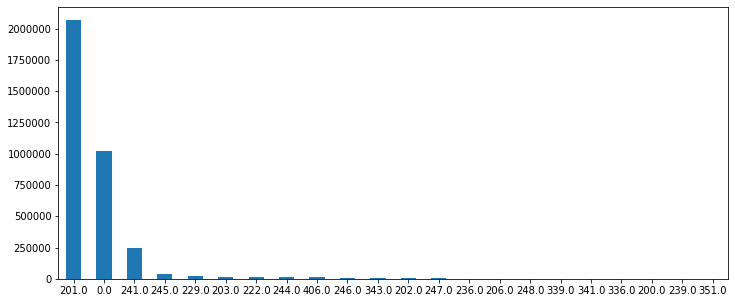

In [4]:
arp_df["TMC"].value_counts().plot.bar(figsize=(12,5), rot=0) #Traffic Message Channel for comm. traffic to drivers

<h3> Conclusion:</h3><br>
<em> Most accidents have a TMC of 201, followed by 241 and 245. Others are insignificant </em>

<h2> Accidents(Number) vs Timezones </h2>

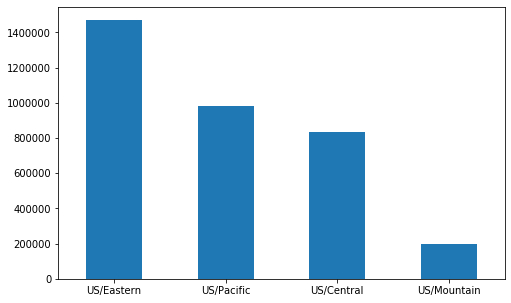

In [5]:
arp_df["Timezone"].value_counts().plot.bar(figsize=(8,5), rot=0) 

<h3>Conclusion:</h3>
<em>Most accidents are happening in Eastern Timezone</em>

<h2> Accidents(Number) vs Road-Side </h2>

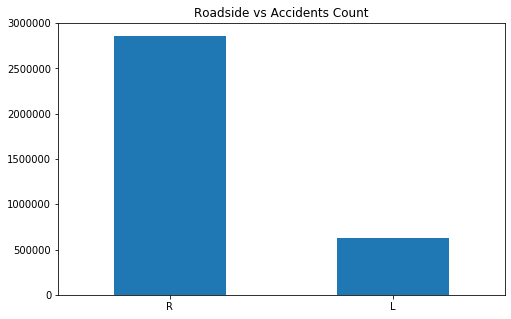

In [6]:
arp_df["Side"].value_counts().plot.bar(figsize=(8,5), rot=0, title='Roadside vs Accidents Count')


<h3>Conclusion:</h3>
<em>Most accidents are happening on Right Side</em>

<h2> Accidents(Number) vs Accident Duration </h2>

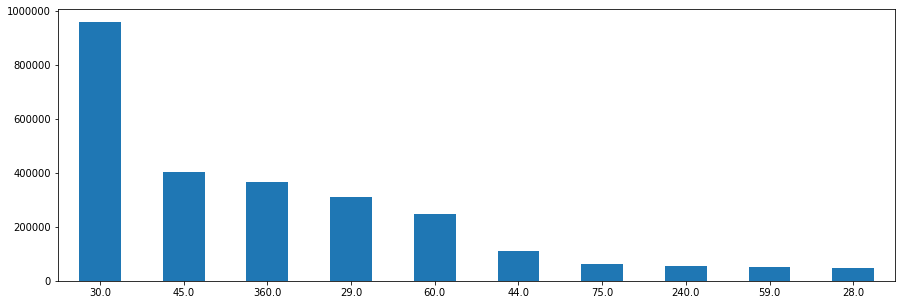

In [7]:
arp_df["accDuration"].value_counts().nlargest(10).plot.bar(figsize=(15,5), rot=0) 

<h3> Conclusion:</h3><br>
<em> Around 40% accidents have a duration of 30 minutes </em> <br>
<em> Accidents with duration > a threshold(e.g. 1 day), can be ignored. It may indicate some work on site. </em>

<h2> Accident Severity vs Accident Duration </h2>

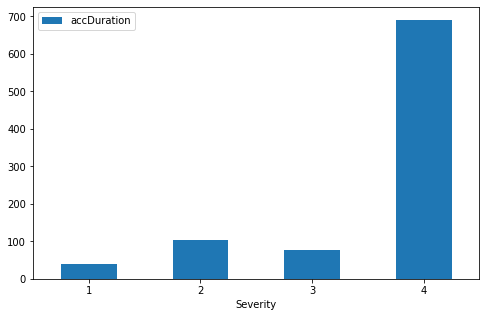

In [8]:
s_d_df = arp_df.groupby(['Severity']).agg({'accDuration': 'mean'}).reset_index()
s_d_df.set_index('Severity').plot.bar(figsize=(8,5), rot=0)

<h3>Conclusion:</h3>
<em>Accidents with severity 4 have longest impact duration</em>

<h2> Impacted distance by severity </h2>

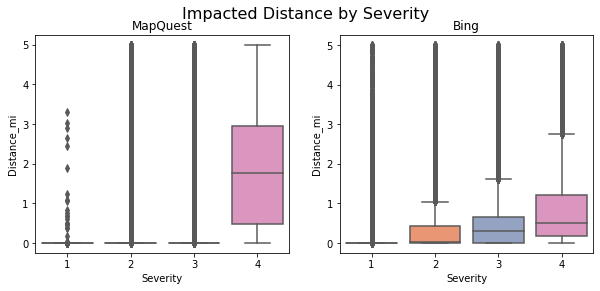

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x="Severity", y="Distance_mi", 
            data=arp_df.loc[(arp_df['Source']=="MapQuest") & (arp_df['Distance_mi']<5),], palette="Set2", ax=axs[0])
axs[0].set_title('MapQuest')
fig.suptitle('Impacted Distance by Severity', fontsize=16)
sns.boxplot(x="Severity", y="Distance_mi",
            data=arp_df.loc[(arp_df['Source']=="Bing") & (arp_df['Distance_mi']<5),], palette="Set2", ax=axs[1])
axs[1].set_title('Bing')
plt.show()

<h3>Conclusion:</h3>
<em>Accidents with severity 4 have longest impact distance</em>

<h2> Streets with highest accident counts </h2>

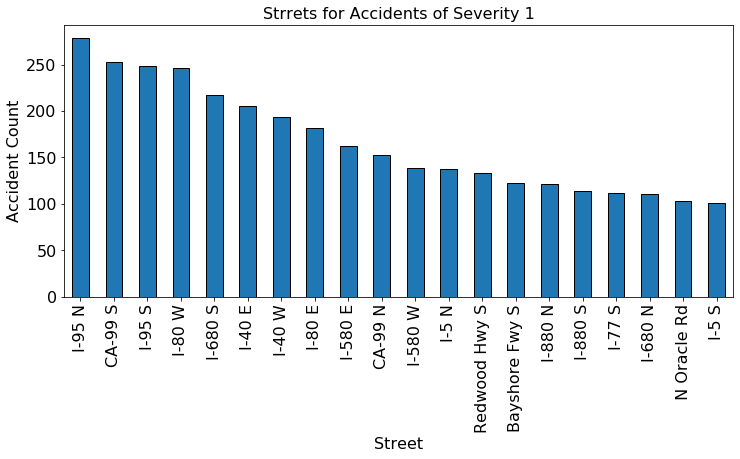

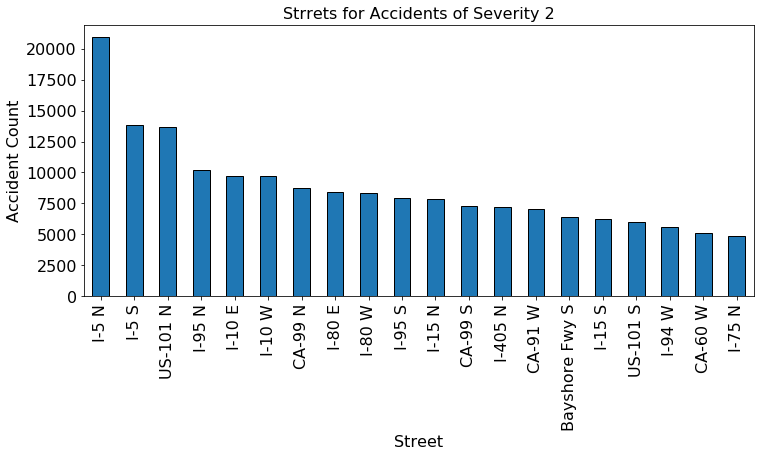

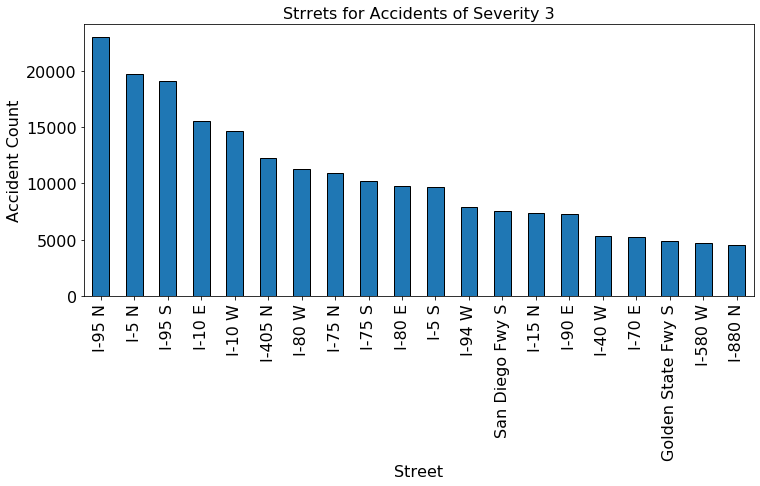

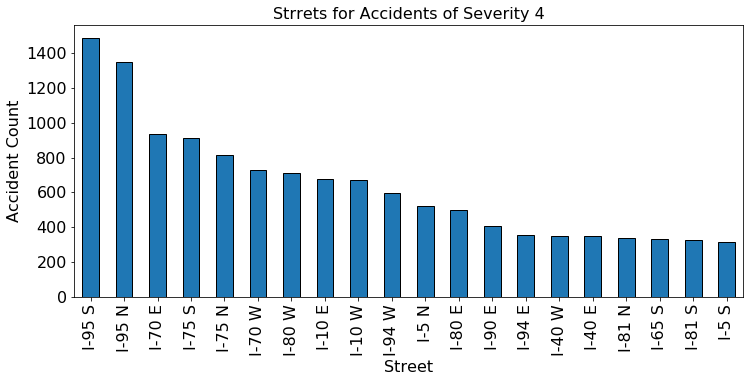

In [10]:
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    arp_df.loc[arp_df["Severity"] == s]['Street'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='tab:blue',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Street',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('Strrets for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

<h3> Conclusion </h3>
<em> Most accidents happen on Interstate Highways </em>

<h2> Accidents count vs Weather Conditions <h2>

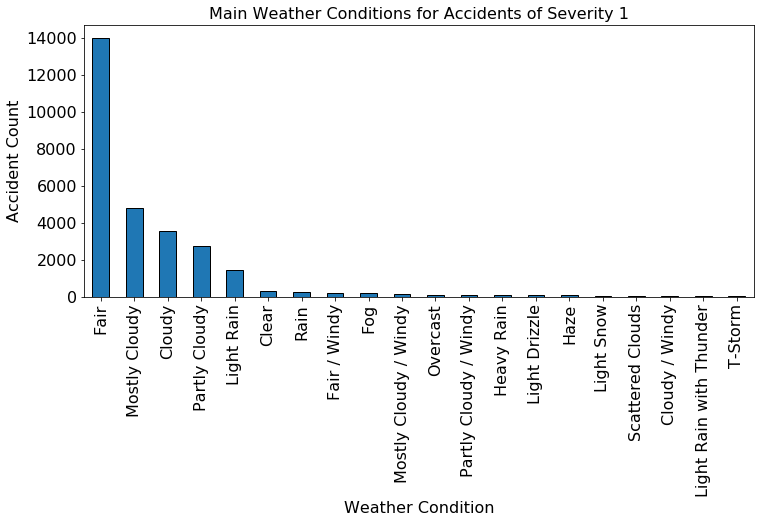

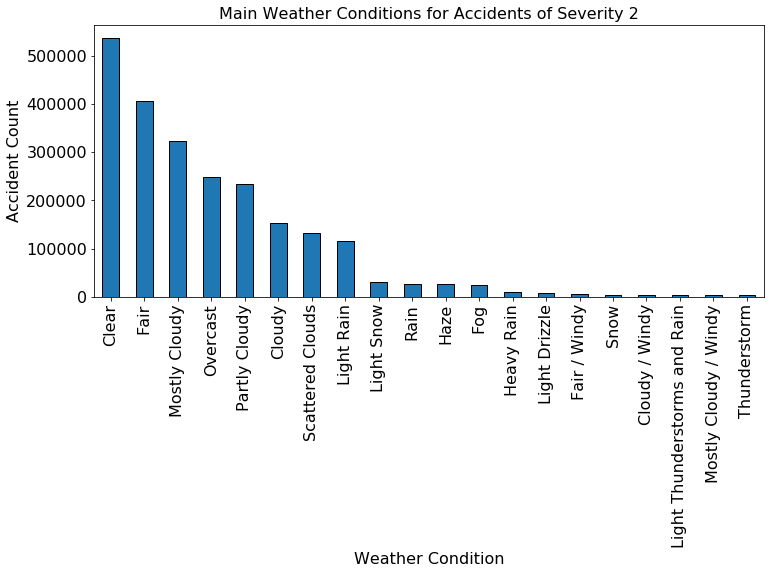

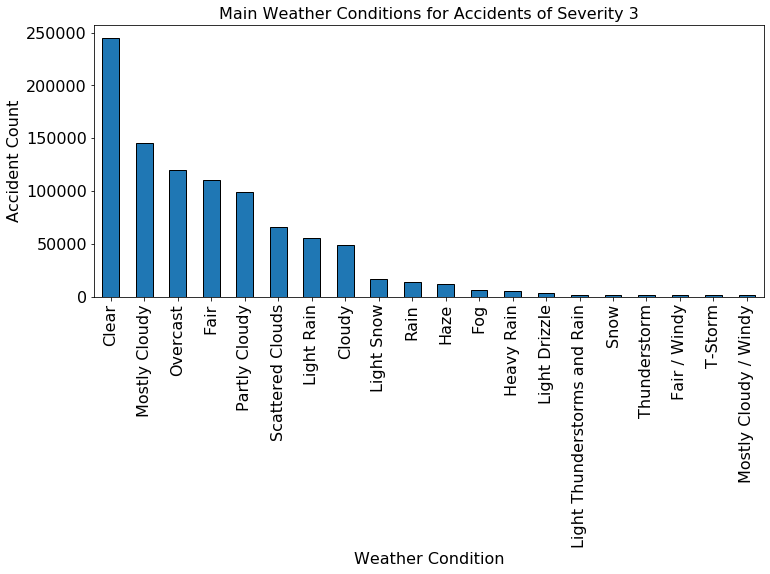

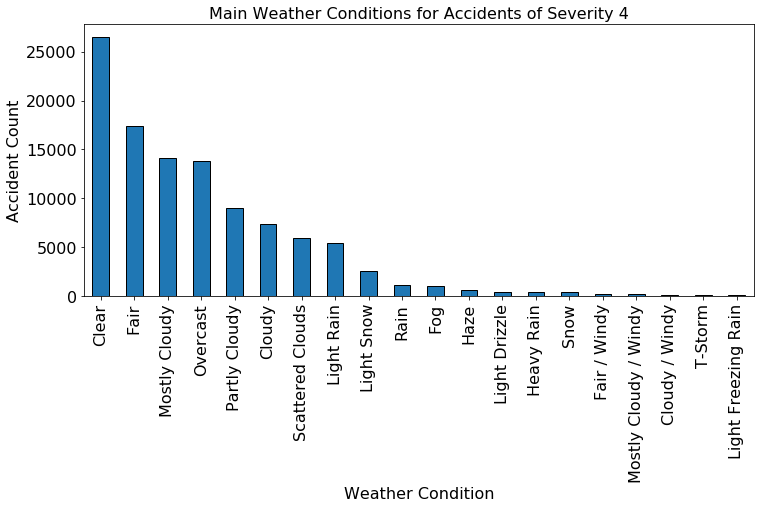

In [15]:
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    arp1_df.loc[arp1_df["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='tab:blue',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

<h3> Conclusion:</h3> <br>
<em> Most accidents occur in Fair, Clear and cloudy weather, however these weather conditions also have higher frequency throughout the year.</em> <br> 
<em>So, we cannot conclude that bad weather does not impact the number of accidents happening. </em>
<em>Thus, we next look at impact of bad weather on higher severity accidents</em>

<h2> Traffic Events Type Distribution </h2>
<em> <b> Based on newly published dataset of Traffic Events having data until Jan'2021 </b> </em>

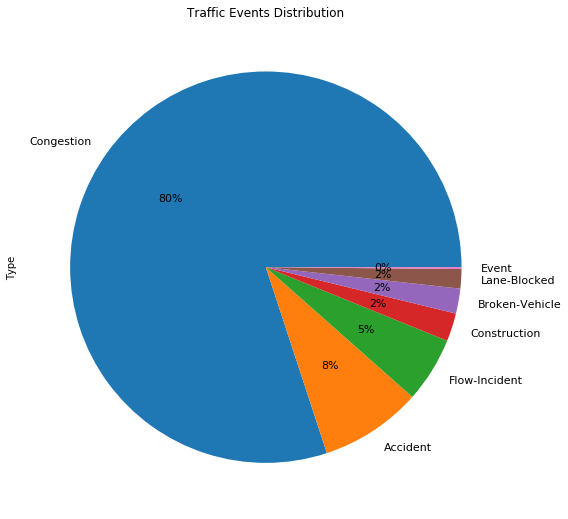

In [16]:
traffic_df['Type'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=11, figsize=(9, 9), title='Traffic Events Distribution')

<h3> Conclusion:</h3> <br>
<em> Most traffic incidents are those of congestion </em> <br> 

<h2> Weather Events Type Distribution </h2>
<em> <b> Based on newly published dataset of Weather Events having data until Jan'2021 </b> </em>

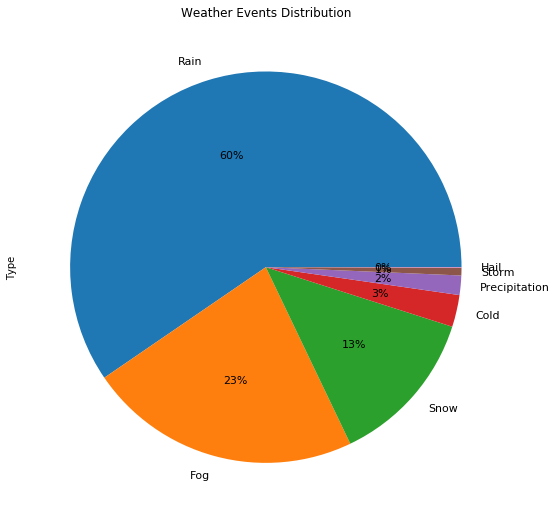

In [17]:
weather_df['Type'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=11, figsize=(9, 9), title='Weather Events Distribution')

<h3> Conclusion:</h3> <br>
<em> Most weather events are those of rain. fog and snow <br> 
    Next we see how these bad weather mainly rain, fog and snow affect accident severity </em>

<h2> Severity vs Bad Weather (Fog, Rain and Snow) <h2>

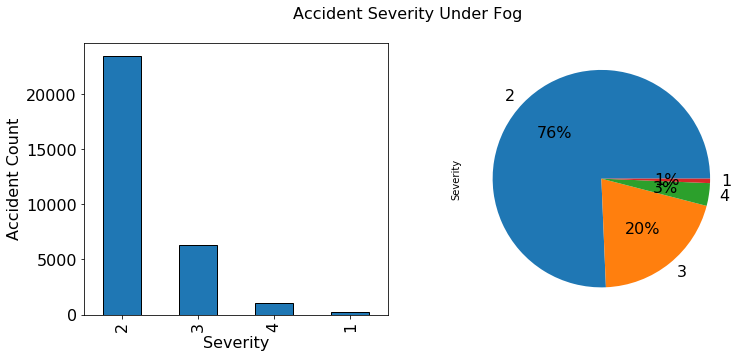

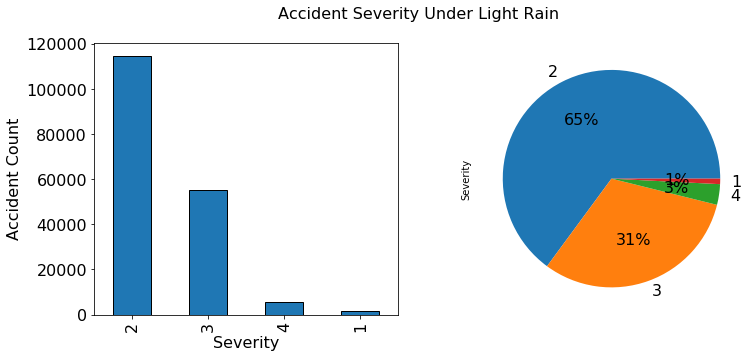

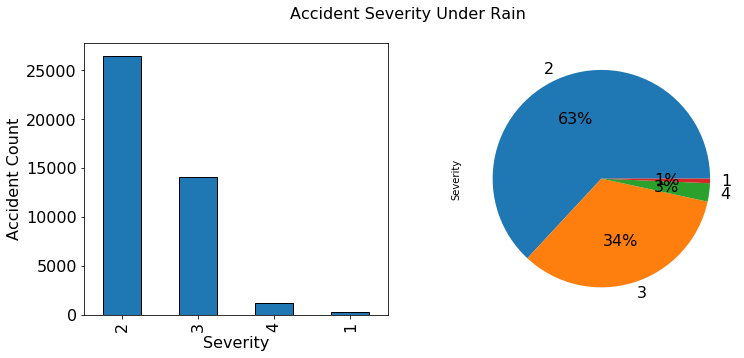

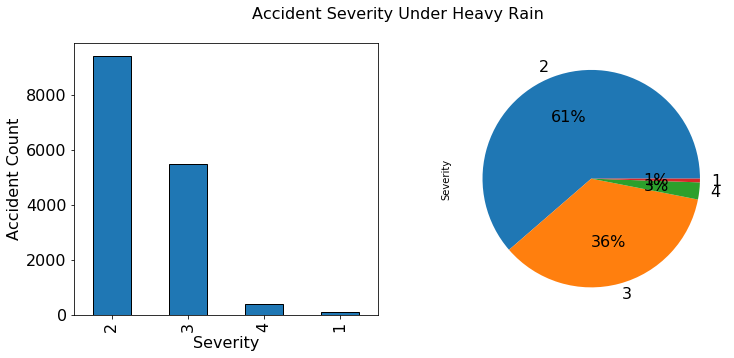

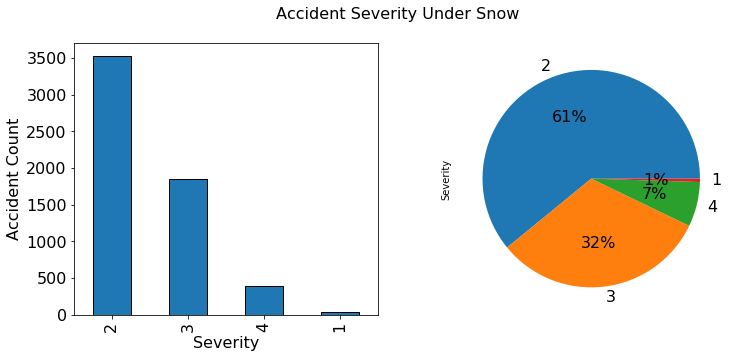

In [19]:
for s in ["Fog","Light Rain","Rain","Heavy Rain","Snow"]:
    plt.subplots(1,2,figsize=(12,5))
    plt.suptitle('Accident Severity Under ' + s,fontsize=16)
    plt.subplot(1,2,1)
    arp1_df.loc[arp1_df["Weather_Condition"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='tab:blue',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    arp1_df.loc[arp1_df["Weather_Condition"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

<h3> Conclusion:</h3> <br>
<em> With rain and snow, count for accidents of severity 3 increase.</em> <br> 

<h2> Accidents with severity vs Temp, Humidity, Pressure, Visibility, Wind <h2>

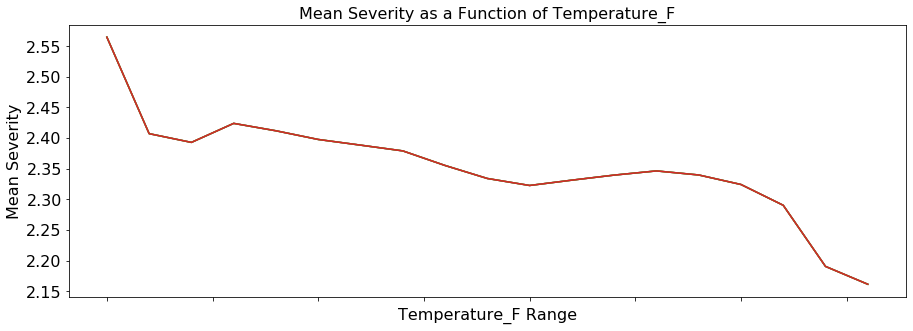

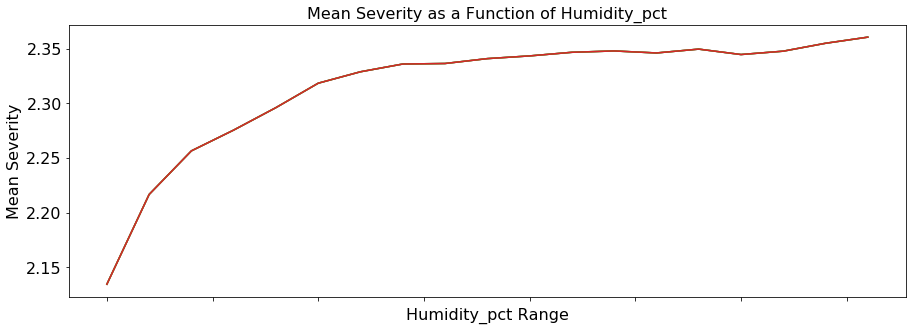

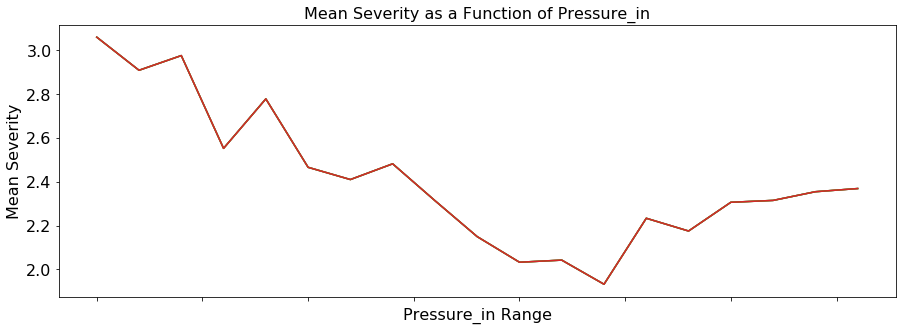

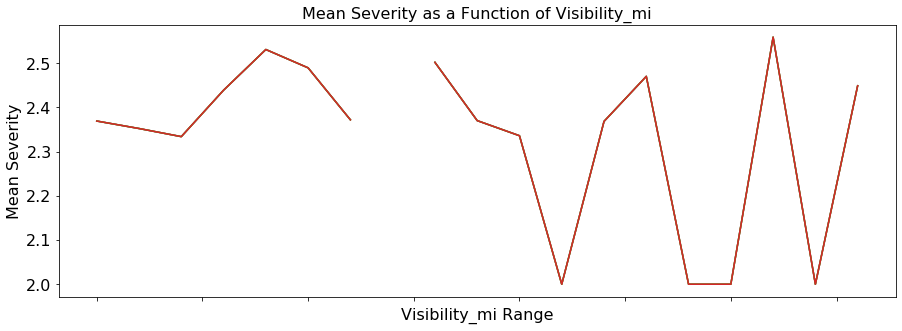

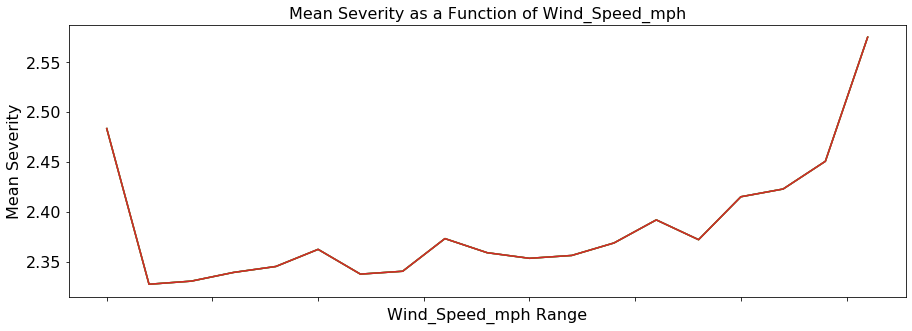

In [23]:
factors = ['Temperature_F', 'Humidity_pct', 'Pressure_in', 'Visibility_mi', 'Wind_Speed_mph']
for factor in factors:
    # remove some of the extreme values
    factorMin = arp1_df[factor].quantile(q=0.0001)
    factorMax = arp1_df[factor].quantile(q=0.9999)
    #print(arp_df["Severity"].groupby(pd.cut(arp_df[factor], np.linspace(factorMin,factorMax,num=20))).count())
    plt.subplots(figsize=(15,5))
    for s in np.arange(1,5):
        arp1_df["Severity"].groupby(pd.cut(arp1_df[factor], np.linspace(factorMin,factorMax,num=20))).mean().plot()
        plt.title("Mean Severity as a Function of " + factor, fontsize=16)
        plt.xlabel(factor + " Range", fontsize=16)
        plt.ylabel("Mean Severity", fontsize=16)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=16)

<h3> Conclusion:</h3> <br>
<em> With increase in Humidity, the Severity of accidents increase.</em> <br> 
<em> With decrease in Temperature, the severity of accidents increase.</em> <br>
<em> Wind_Speed, Visibility, Pressure: No clear correlation with severity.</em> 

<h2> Accidents with severity at points of interests (Bump, Crossing etc.) <h2>

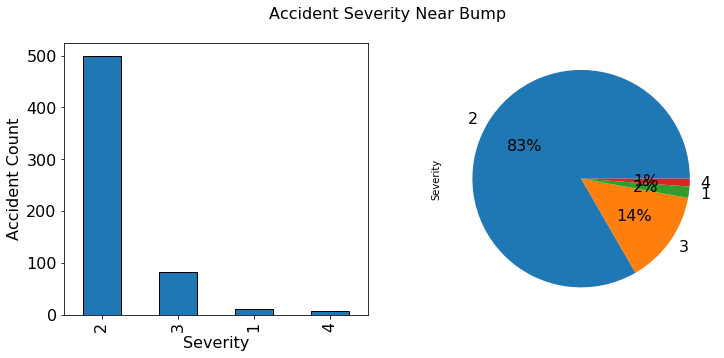

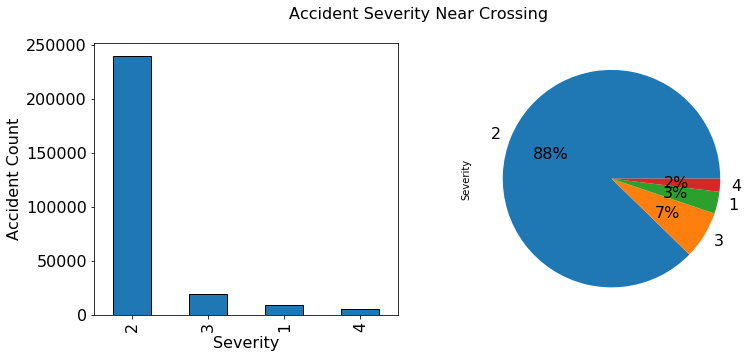

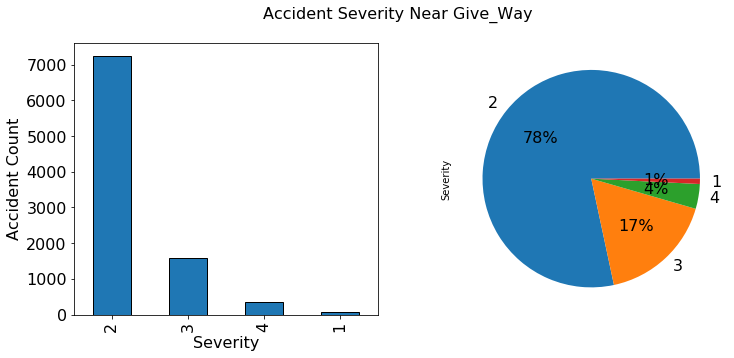

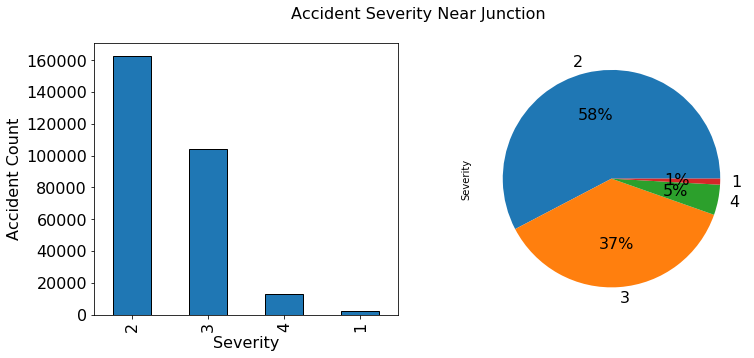

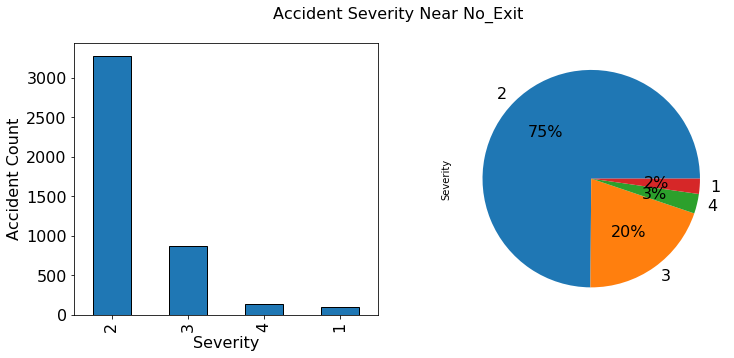

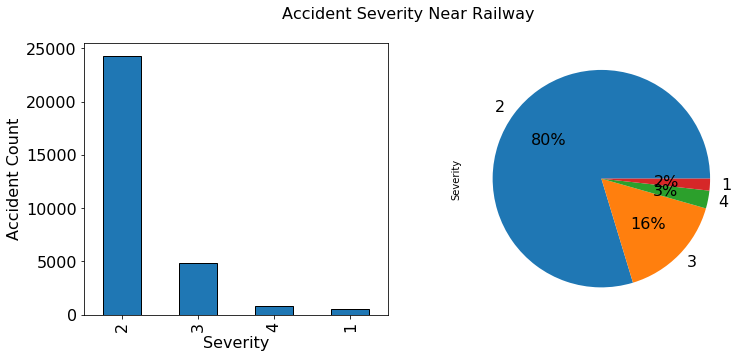

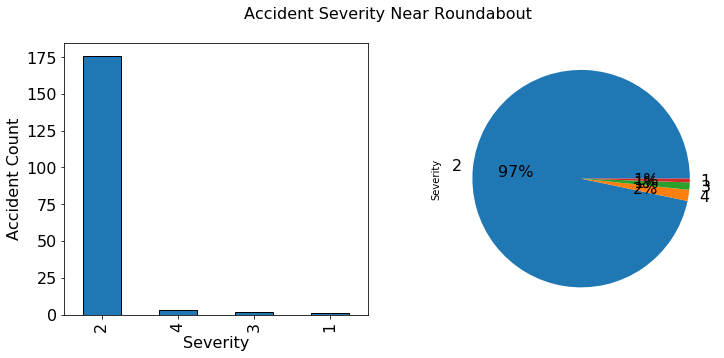

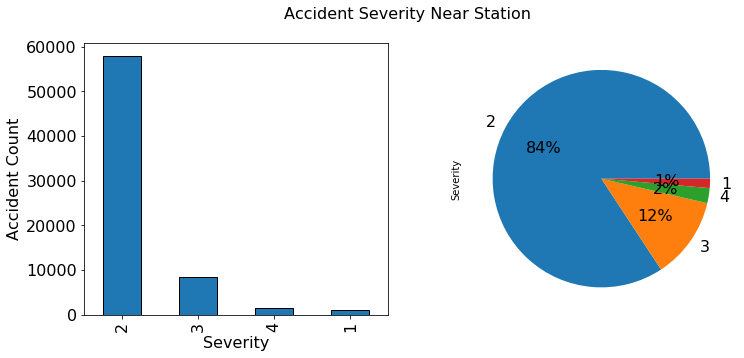

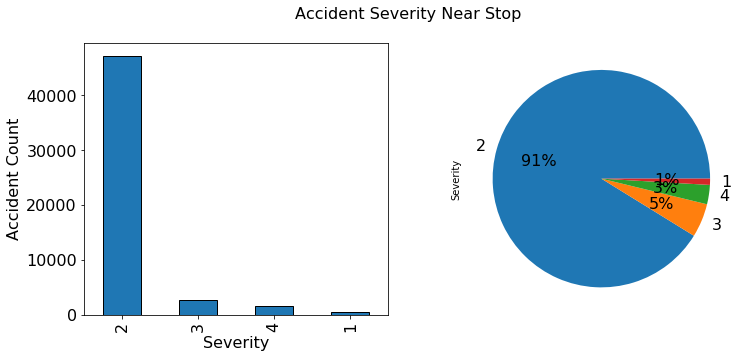

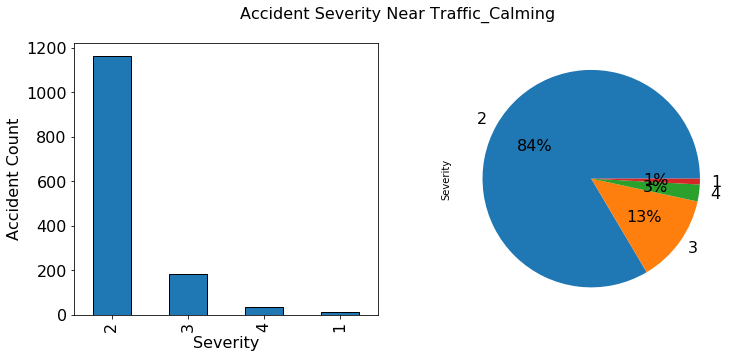

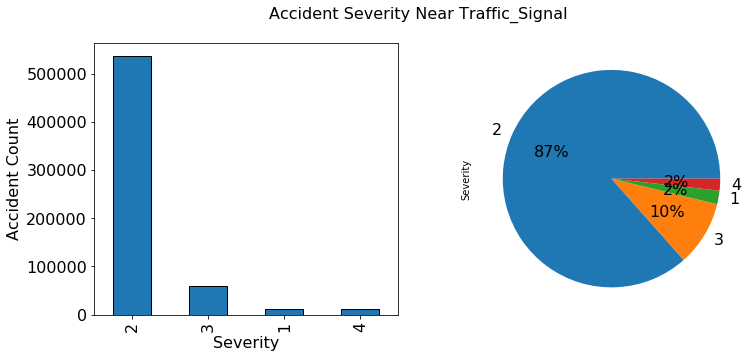

In [24]:
for s in ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']:
    # check if infrastructure type is found in any record 
    if (arp_df[s] == True).sum() > 0:
        plt.subplots(1,2,figsize=(12,5))
        plt.xticks(fontsize=14)
        plt.suptitle('Accident Severity Near ' + s,fontsize=16)
        plt.subplot(1,2,1)
        arp_df.loc[arp_df[s] == True]['Severity'].value_counts().plot.bar(width=0.5,color='tab:blue',edgecolor='k',align='center',linewidth=1)
        plt.xlabel('Severity',fontsize=16)
        plt.ylabel('Accident Count',fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.subplot(1,2,2)
        arp_df.loc[arp_df[s] == True]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

<h3> Conclusion:</h3> <br>
<em> At Junction and No_Exit, severity(3 & 4) of accidents increase.</em> <br>
<em> At Roundabout, severity(2) of accidents are very much.</em>

<h2>Most populated cities of USA (>110 Million)</h2>
<em>Accidents happen more where population density is more? </em>

In [27]:
cities_df = geopandas.read_file("../data_files/geo_basics/ne_110m_populated_places.shp") #>110 Million pop cities
req_df = cities_df[cities_df.within(usa_df.geometry.squeeze())] 

In [28]:
#creating color codes for different severities
c = ['g','c','y','r']  #1:g , 2:c, 3:y, 4:r

                  Accidents with severity 1,2,3 and 4 in sequence...


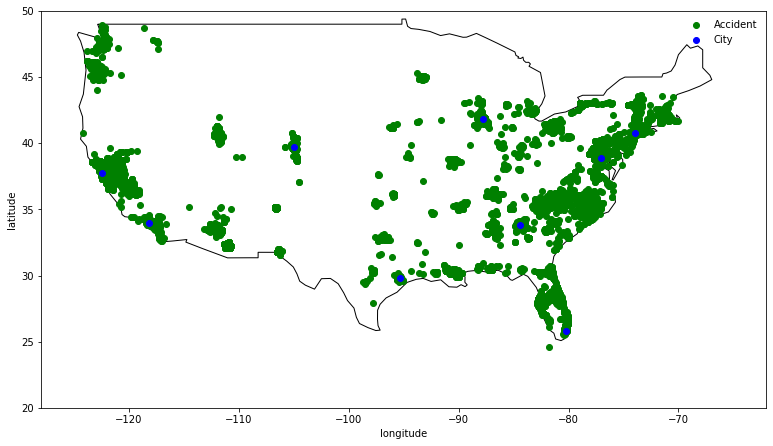

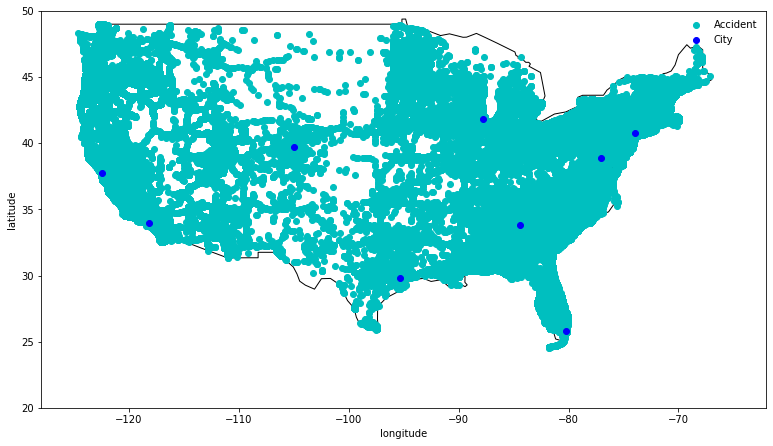

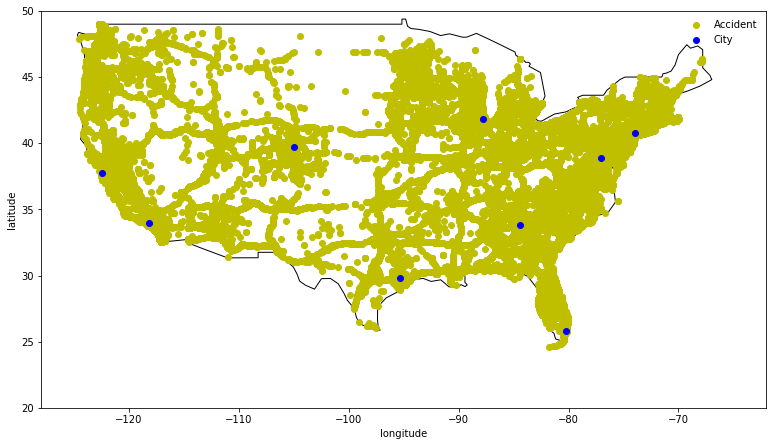

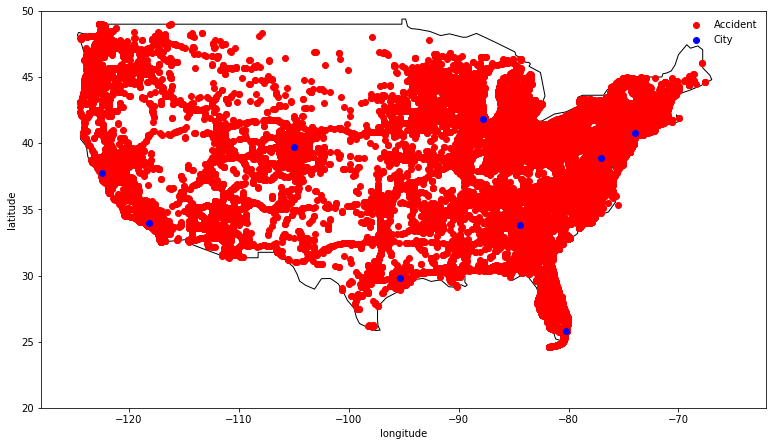

In [29]:
print('                  Accidents with severity 1,2,3 and 4 in sequence...')
for i in range(len(c)):
     red_arp_gdf = arp_df.loc[arp_df['Severity']==(i+1)][['ID','geometry']]
     ax = usa_df.plot(edgecolor='k', facecolor='none', figsize=(13, 8))
     red_arp_gdf.plot(ax=ax, color=c[i], label='Accident')
     req_df.plot(ax=ax, color='b', label='City')
     ax.legend(loc='upper right', frameon=False)
     ax.set(xlim=(-128, -62), ylim=(20, 50))
     ax.set_ylabel('latitude')
     ax.set_xlabel('longitude')

<h2> Data Analysis on Model Results</h2>

Text(0.5, 0, 'Models')

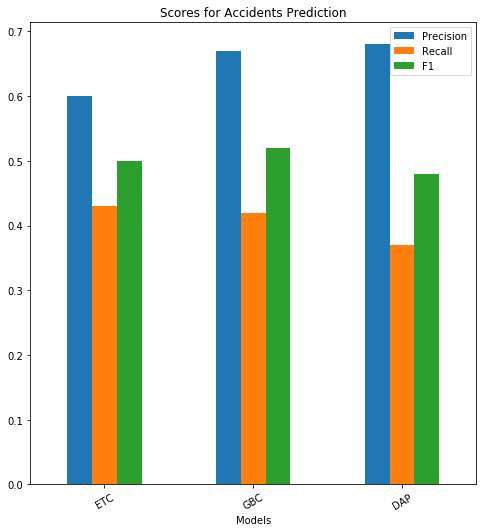

In [63]:
model_results_df = pd.read_csv('../data_files/results/model_results_accidents.csv') 
model_results_df.plot(kind='bar', x='Models', title='Scores for Accidents Prediction', figsize=(8,8.5), rot=30).set_xlabel("Models")

Text(0.5, 0, 'Models')

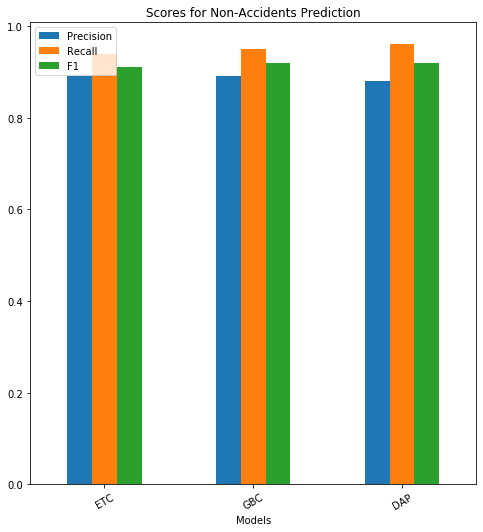

In [62]:
model_results_nonAcc_df = pd.read_csv('../data_files/results/model_results_non_accidents.csv') 
model_results_nonAcc_df.plot(kind='bar', x='Models', title='Scores for Non-Accidents Prediction', figsize=(8,8.5), rot=30).set_xlabel("Models")